In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
lr, logr, sc = LinearRegression(), LogisticRegression(), StandardScaler()

In [2]:
file = pd.read_csv("Dataset-master\Mall_Customers.csv")

In [3]:
file.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
x = file[['Annual Income (k$)','Spending Score (1-100)']].values
x[0:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [5]:
from sklearn.cluster import KMeans

In [8]:
lis = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5)
    kmeans.fit(x)
    lis.append(kmeans.inertia_)
print(lis)
print(type(kmeans))

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25079.766962115897, 21850.165282585633, 19712.851860217073]
<class 'sklearn.cluster.k_means_.KMeans'>


Text(0,0.5,'')

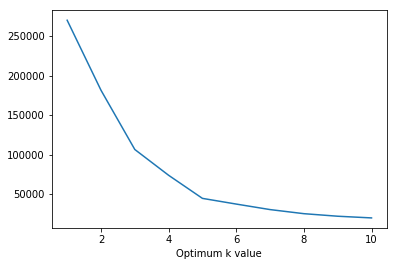

In [80]:
plt.plot(range(1,11),lis)
plt.xlabel('Optimum k value')
plt.ylabel('')

In [81]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=5)
kmeans.fit(x)
pred = kmeans.predict(x)
print(pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Text(0,0.5,'Spending Score ')

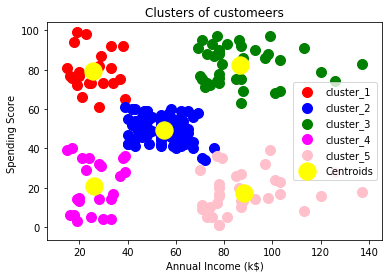

In [105]:
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 100, c = 'red', label = 'cluster_1')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 100, c = 'blue', label = 'cluster_2')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 100, c = 'green', label = 'cluster_3')
plt.scatter(x[pred == 3, 0], x[pred == 3, 1], s = 100, c = 'magenta', label = 'cluster_4')
plt.scatter(x[pred == 4, 0], x[pred == 4, 1], s = 100, c = 'pink', label = 'cluster_5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.title('Clusters of customeers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score ')

In [83]:
pred == 1,0

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
      

In [84]:
x[pred == 1,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [85]:
pred.shape, pred.size

((200,), 200)

In [86]:
pred == 0,1

(array([False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [87]:
x[pred == 0,1] #spending_score which are in cluster_0

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65], dtype=int64)

In [88]:
x[pred == 0,0] #annual_income in cluster_0       pred == cluster_number, annual_income/Spending_score i.e, 0/1

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39], dtype=int64)

In [101]:
plt.legend?